# House Price Prediction using ML EDA

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats
from scipy.stats import norm, skew #for some statistics
# from scipy.special import boxcox1p
# from scipy.stats import boxcox_normmax

/Users/inaba3910/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import Data

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
print("Train set size:", train.shape)
print("Test set size:", test.shape)

Train set size: (1460, 81)
Test set size: (1459, 80)


In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

## Data Exploration and Cleaning

### Outcome Variable - SalePrice

In [5]:
# delete 'Id' column in both datasets, since these are not useful in predictions
train_id = train['Id']
test_id = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

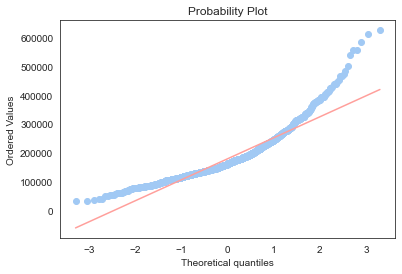

In [6]:
# next, exploring the target variable 'SalePrice', 
# remove the 4 outliers mentioned in the documentation that SalePrice>700000 and before handling 'SalePrice'
train = train[train.SalePrice < 700000]
train = train[train.GrLivArea < 4000]
train.reset_index(drop=True, inplace=True)
# train.shape
# check the distribution
sns.set_style("white")
sns.set_color_codes(palette='pastel')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(train['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()
res = stats.probplot(train['SalePrice'], plot=plt)

In [7]:
# check skewness
print(train['SalePrice'].skew())
print(train['SalePrice'].kurt())

1.5659592925562151
3.8852828233316745


Here, I removed the 4 outliers mentioned in the documentation and then do further EDA. The distribution of the outcome variable, SalePrice, is slightly right skewed. To meet the basic assumptions of linear regression, we need to normalize it.

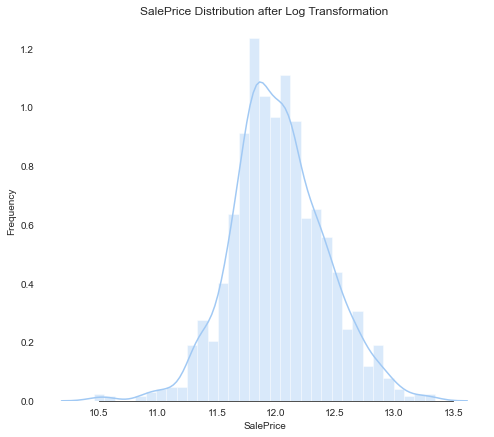

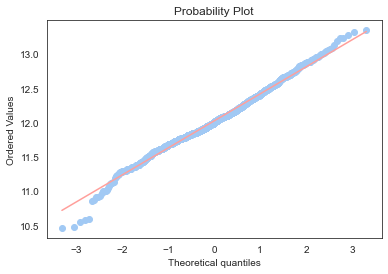

In [8]:
# Since 'SalePrice' is positively skewed, we need to transform it to normal distribution before modeling
# box-cox transformation / log transformation either should work, here I chose log transformation
train['SalePrice'] = np.log(train['SalePrice'])
sns.set_style("white")
sns.set_color_codes(palette='pastel')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(train['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice Distribution after Log Transformation")
sns.despine(trim=True, left=True)
plt.show()
res = stats.probplot(train['SalePrice'], plot=plt)

### Bivariate Analysis of Some Important Features based on Domain Knowledge

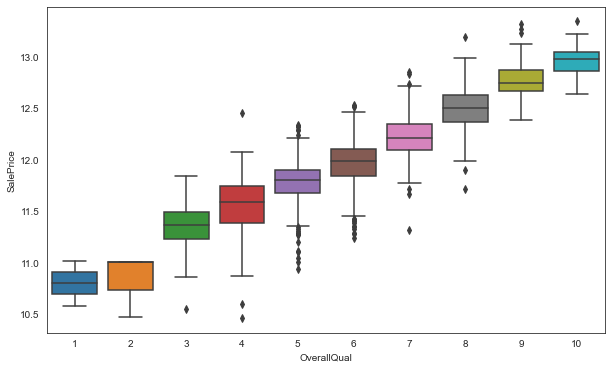

In [9]:
# the quality of the house might be associated with the sale price
plt.subplots(figsize=(10,6))
sns.boxplot(x=train['OverallQual'], y=train['SalePrice'])

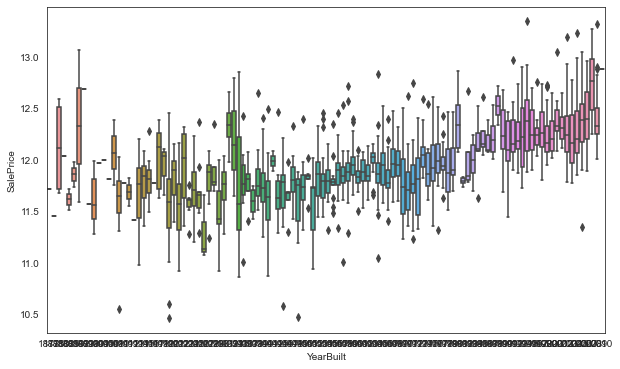

In [10]:
# the time of the house built might be associated with the sale price
plt.subplots(figsize=(10,6))
sns.boxplot(x=train['YearBuilt'], y=train['SalePrice'])

In [11]:
# the squre feet of living area above ground might be associated with the sale price
fig, ax = plt.subplots(figsize=(15,6))
fig = sns.boxplot(x=train['GrLivArea'], y=train['SalePrice'])

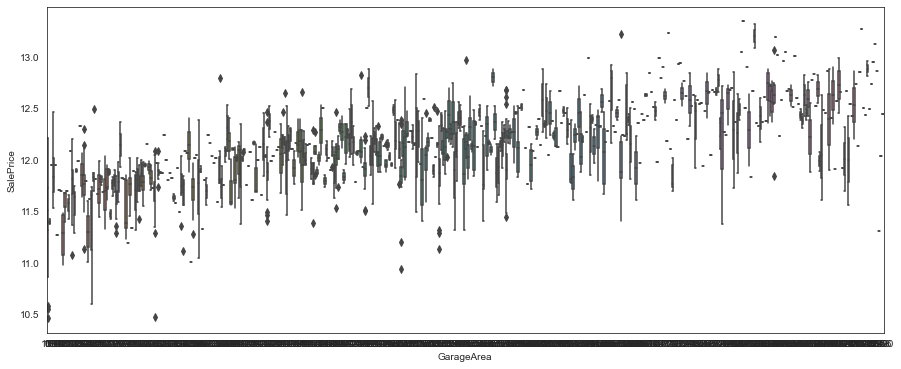

In [12]:
# the square feet of the garage area might be associated with the sale price
plt.subplots(figsize=(15,6))
sns.boxplot(x=train['GarageArea'], y=train['SalePrice'])

All bivariate analysis shown that the square feet of the house (any known area counted) are very important to the sale price. The overall quality and how old the house is are important features as well. Let's see how we can do better in feature engineering and see this pattern clearer.

### Skewness in other variables

In [13]:
# First we need to find all numeric features in the data
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in train.columns:
    if train[i].dtype in numeric_dtypes:
        numerics.append(i)

In [14]:
# Box plots for all our numeric features, visualize them to see the distributions
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=train[numerics] , orient="h", palette="Set1")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Distribution of Numeric Features")
sns.despine(trim=True, left=True)

In [16]:
# Find the skewed numerical features
skew_features = train[numerics].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[abs(skew_features) > 1]
skew_index = high_skew.index
print("There are {} numerical features with |Skew| > 1 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 13 numerical features with |Skew| > 1 :


MiscVal          24.418175
PoolArea         17.504556
LotArea          12.574590
3SsnPorch        10.279262
LowQualFinSF      8.989291
KitchenAbvGr      4.476748
BsmtFinSF2        4.244209
BsmtHalfBath      4.124712
ScreenPorch       4.111400
EnclosedPorch     3.081275
dtype: float64

Although here we can see a lot of highly skewed numerical variables, I considered it would be better keeping those variables as their original form to make results more interpretable. After modeling, if the highly skewed variables do affect regression a lot, we can comeback and do data transformation again, and normalize them shown as below.

In [20]:
# # Normalise skewed features
# np.seterr(divide = 'ignore') 
# for i in skew_index:
#     train_fillna[i] = np.log(train_fillna[i])

In [21]:
# sns.set_style("white")
# f, ax = plt.subplots(figsize=(8, 7))
# ax.set_xscale("log")
# ax = sns.boxplot(data=train_fillna[skew_index] , orient="h", palette="Set1")
# # Tweak the visual presentation
# ax.xaxis.grid(False)
# ax.set(ylabel="Feature names")
# ax.set(xlabel="Numeric values")
# ax.set(title="Numeric Distribution of Features")
# sns.despine(trim=True, left=True)

In [22]:
# # Find the skewed  numerical features
# skew_features2 = train_fillna[numerics].apply(lambda x: skew(x)).sort_values(ascending=False)

# high_skew2 = skew_features2[skew_features2 > 1]
# skew_index2 = high_skew2.index
# print("There are {} numerical features with Skew > 1 :".format(high_skew2.shape[0]))
# skewness = pd.DataFrame({'Skew' :high_skew2})
# skew_features2.head(10)

In [23]:
# np.seterr(divide = 'ignore') 
# for i in skew_index:
#     test_fillna[i] = np.log(test_fillna[i])

In [24]:
# Find the skewed  numerical features


# numerics.remove('SalePrice')
# skew_features3 = test_fillna[numerics].apply(lambda x: skew(x)).sort_values(ascending=False)

# high_skew3 = skew_features3[skew_features3 > 1]
# skew_index3 = high_skew3.index
# print("There are {} numerical features with Skew > 1 :".format(high_skew3.shape[0]))
# skewness = pd.DataFrame({'Skew' :high_skew3})
# skew_features3.head(10)

### Missingness and Imputation

In [25]:
# function for determining the threshold of missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

# check states of missing values in train set
missing = percent_missing(train)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:20]

Percent of missing data


[('PoolQC', 99.66),
 ('MiscFeature', 96.29),
 ('Alley', 93.75),
 ('Fence', 80.77),
 ('FireplaceQu', 47.39),
 ('LotFrontage', 17.79),
 ('GarageType', 5.56),
 ('GarageYrBlt', 5.56),
 ('GarageFinish', 5.56),
 ('GarageQual', 5.56),
 ('GarageCond', 5.56),
 ('BsmtExposure', 2.61),
 ('BsmtFinType2', 2.61),
 ('BsmtQual', 2.54),
 ('BsmtCond', 2.54),
 ('BsmtFinType1', 2.54),
 ('MasVnrType', 0.55),
 ('MasVnrArea', 0.55),
 ('Electrical', 0.07),
 ('MSSubClass', 0.0)]

In [26]:
# check states of missing values in test set
missing = percent_missing(test)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:35]

Percent of missing data


[('PoolQC', 99.79),
 ('MiscFeature', 96.5),
 ('Alley', 92.67),
 ('Fence', 80.12),
 ('FireplaceQu', 50.03),
 ('LotFrontage', 15.56),
 ('GarageYrBlt', 5.35),
 ('GarageFinish', 5.35),
 ('GarageQual', 5.35),
 ('GarageCond', 5.35),
 ('GarageType', 5.21),
 ('BsmtCond', 3.08),
 ('BsmtQual', 3.02),
 ('BsmtExposure', 3.02),
 ('BsmtFinType1', 2.88),
 ('BsmtFinType2', 2.88),
 ('MasVnrType', 1.1),
 ('MasVnrArea', 1.03),
 ('MSZoning', 0.27),
 ('Utilities', 0.14),
 ('BsmtFullBath', 0.14),
 ('BsmtHalfBath', 0.14),
 ('Functional', 0.14),
 ('Exterior1st', 0.07),
 ('Exterior2nd', 0.07),
 ('BsmtFinSF1', 0.07),
 ('BsmtFinSF2', 0.07),
 ('BsmtUnfSF', 0.07),
 ('TotalBsmtSF', 0.07),
 ('KitchenQual', 0.07),
 ('GarageCars', 0.07),
 ('GarageArea', 0.07),
 ('SaleType', 0.07),
 ('MSSubClass', 0.0),
 ('LotArea', 0.0)]

Among all columns with missing values, PoolQC, MiscFeature, Alley, Fence, FireplaceQu, and LotFrontage are the top columns with a lot of missing values. Luckily, most of the missingness in these columns represent 'None' value. Detailed imputations strategies are shown below.

In [27]:
# imputation
# create a function to impute misssing values for the feature variables not related to neither basements or garages.
def impute_other(df):
    # some of the non-numeric predictors are stored as numbers; we convert them into strings at start
    df['MSSubClass'] = df['MSSubClass'].apply(str)
    df['YrSold'] = df['YrSold'].astype(str)
    df['MoSold'] = df['MoSold'].astype(str)
    # missing means 'None' as descripted in the data documentation
    df['Alley'] = df['Alley'].fillna('No Alley')
    df['Fence'] = df['Fence'].fillna('No Fence')
    df['MiscFeature'] = df['MiscFeature'].fillna('None')
    df['MasVnrType'] = df['MasVnrType'].fillna('None')
    # some variables actually represent missing observations (as can be told from feature variables relating to the same category of housing feature)
    # impute as the mode if the missing value represents a missing observation, impute as "No X" if it does not
    df.loc[df['PoolArea']==0, 'PoolQC'] = 'No Pool'
    df.loc[np.logical_and(df['PoolArea']!=0, df['PoolQC'].isnull()==True), 'PoolQC'] = df['PoolQC'].mode()[0]
    df.loc[df['Fireplaces']==0, 'FireplaceQu'] = 'No Fireplace'
    df.loc[np.logical_and(df['Fireplaces']!=0, df['FireplaceQu'].isnull()==True), 'FireplaceQu'] = df['FireplaceQu'].mode()
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    df.loc[np.logical_and(df['MasVnrArea']!=0, df['MasVnrType'].isnull()==True), 'MasVnrType'] = df['MasVnrType'].mode()[0]
    # Impute true missing values with mode imputation if 
    # missing does not mean 'None' as descripted in the data documentation
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])
    df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    df['LotFrontage'] = df.groupby('LotConfig')['LotFrontage'].transform(lambda x: x.fillna(x.mode()[0]))
    
# create a function to impute misssing values for the feature variables related to basements.
def impute_basements(df):
    col_list = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
    num_col_list = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
    
    # encode all non numerical columns that are missing as "No Basement"
    for i in col_list:
        df[i] = df[i].fillna('None')
    
    # if a given feature is missing and that observation has been established as having No Basement above, impute 0 for numeric features.        
    df.loc[df['BsmtQual']=='None', num_col_list] = float(0)

# create a function to impute misssing values for the feature variables related to garages.
def impute_garages(df):
    col_list = ['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual']
    num_col_list = ['GarageYrBlt', 'GarageCars', 'GarageArea']
    
    # encode all non numerical columns that are missing as "No Garage"
    for i in col_list:
        df[i] = df[i].fillna('None')
    
    # if a given feature is missing and that observation has been established as having No Garage above, impute 0 for numeric features.        
    df.loc[df['GarageQual']=='None', num_col_list] = float(0)
            
    # impute any remaining missing values in the Garage features
    df['GarageCars'] = df.groupby(['GarageType'], sort=False)['GarageCars'].apply(lambda x: x.fillna(round(x.mean(), 0)))
    df['GarageArea'] = df.groupby(['GarageType'], sort=False)['GarageArea'].apply(lambda x: x.fillna(round(x.mean(), 0)))
    df['GarageYrBlt'] = df.groupby(['YearBuilt'], sort=False)['GarageYrBlt'].apply(lambda x: x.fillna(round(x.mean(), 0)))
    
# ensemble functions   
def impute_data(df):
    impute_other(df)
    impute_basements(df)
    impute_garages(df)
    return df

In [28]:
# deploy impute_data function to test and train sets
train_fillna =  impute_data(train)
test_fillna = impute_data(test)

In [29]:
# check states of missing values in train set
missing = percent_missing(train_fillna)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:20]

Percent of missing data


[('MSSubClass', 0.0),
 ('MSZoning', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('Alley', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', 0.0),
 ('LandSlope', 0.0),
 ('Neighborhood', 0.0),
 ('Condition1', 0.0),
 ('Condition2', 0.0),
 ('BldgType', 0.0),
 ('HouseStyle', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0)]

In [30]:
# check states of missing values in test set
missing = percent_missing(test_fillna)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:20]

Percent of missing data


[('MSSubClass', 0.0),
 ('MSZoning', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('Alley', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', 0.0),
 ('LandSlope', 0.0),
 ('Neighborhood', 0.0),
 ('Condition1', 0.0),
 ('Condition2', 0.0),
 ('BldgType', 0.0),
 ('HouseStyle', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0)]

### Outliers

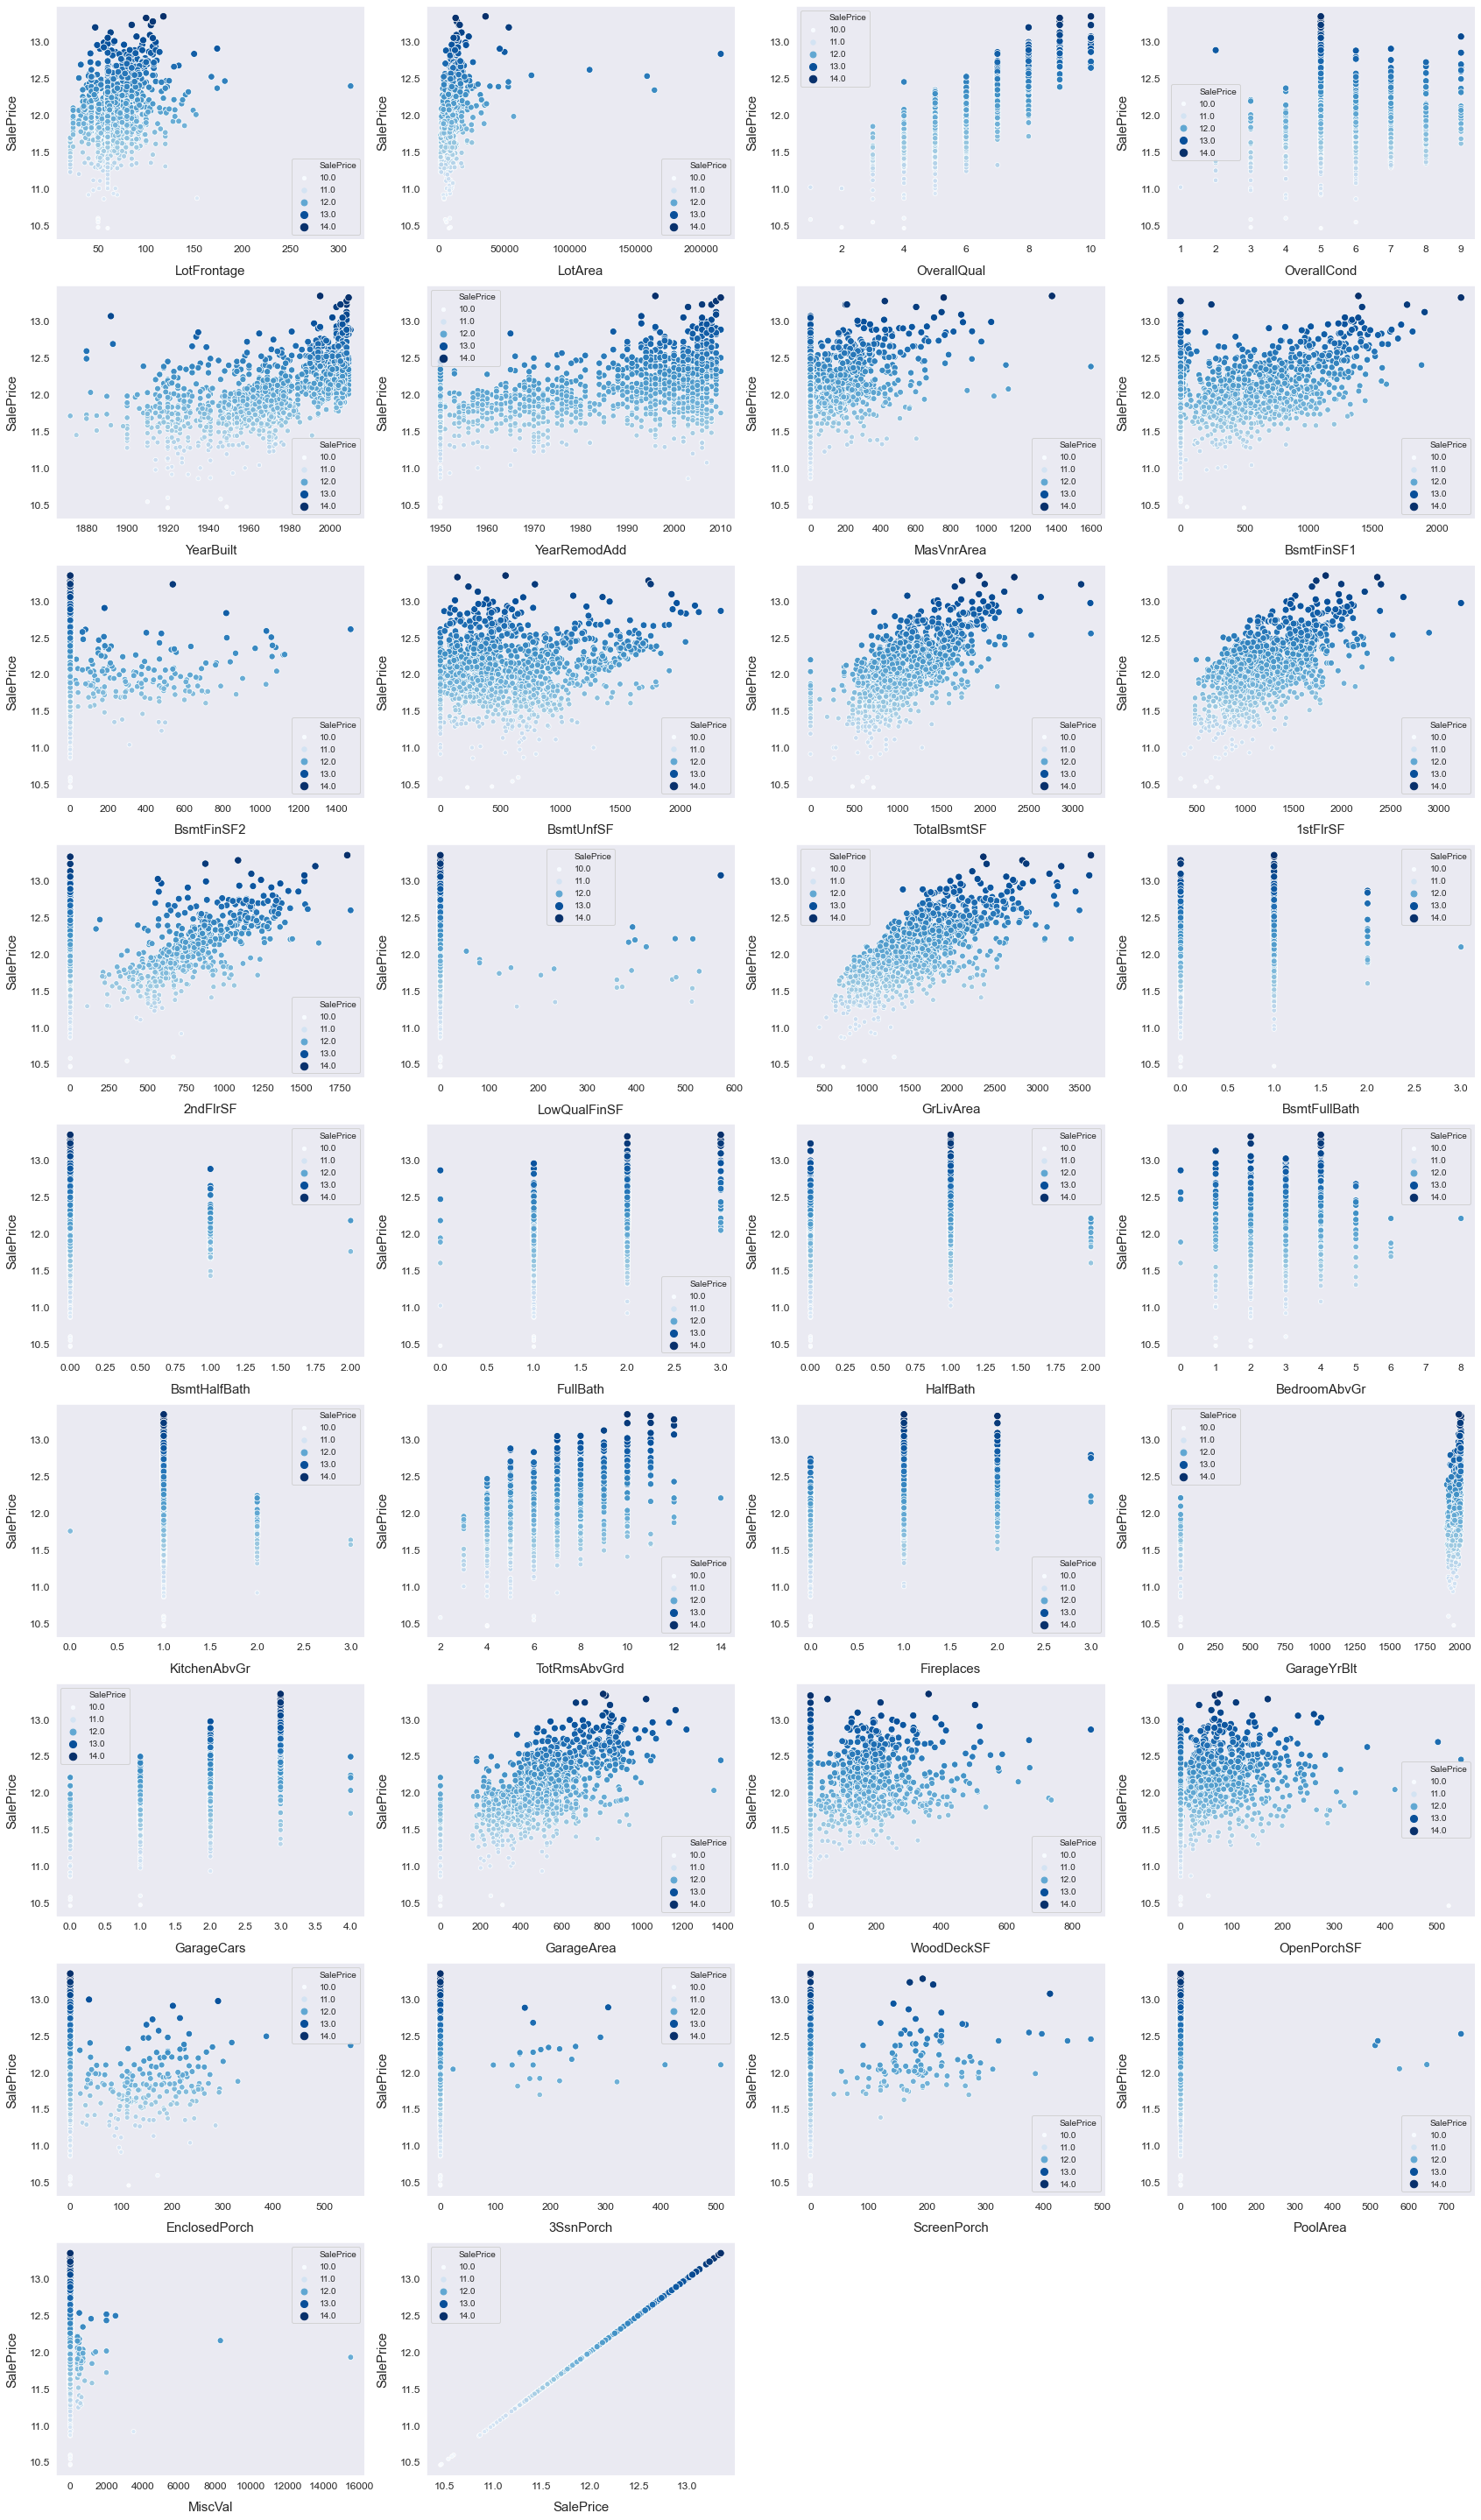

In [31]:
# finding numeric features
sns.set_style("dark")
numeric2_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in train_fillna.columns:
    if train_fillna[i].dtype in numeric_dtypes:
        numerics2.append(i) 
        
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 80))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

cmap = sns.cubehelix_palette(dark=0.3, light=0.8, as_cmap=True)

for i, feature in enumerate(list(train_fillna[numerics2]), 1):    
    plt.subplot(len(list(numerics2)), 4, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', size='SalePrice', palette='Blues', data=train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

In [32]:
# delete some outliers by eyebowling the plots
# 1 observation
train_fillna = train_fillna[train_fillna.LotFrontage < 300]
# 2 observations
train_fillna = train_fillna[train_fillna.MiscVal < 8000]
# train_fillna = train_fillna[train_fillna.LotArea < 200000]
train_fillna.shape

(1453, 80)

Besides the four ourliers mentioned by the documentation, I found 3 more outliers according to the scatterplots. One is the observation with LotFrontage larger than 300, and the other two are miscellaneous feature larger than 8000.

### Add and Modify Features

In [33]:
# simplify some features for ML models and build some new features based on our own intuition
#  adding total sqfootage feature 
train_fillna['TotalSF']=train_fillna['TotalBsmtSF'] + train_fillna['1stFlrSF'] + train_fillna['2ndFlrSF']
#  adding total bathrooms feature
train_fillna['Total_Bathrooms'] = (train_fillna['FullBath'] + (0.5 * train_fillna['HalfBath']) +
                               train_fillna['BsmtFullBath'] + (0.5 * train_fillna['BsmtHalfBath']))
#  adding total porch sqfootage feature
train_fillna['Total_porch_sf'] = (train_fillna['OpenPorchSF'] + train_fillna['3SsnPorch'] +
                              train_fillna['EnclosedPorch'] + train_fillna['ScreenPorch'] +
                              train_fillna['WoodDeckSF'])

In [34]:
#  adding total sqfootage feature 
test_fillna['TotalSF']=test_fillna['TotalBsmtSF'] + test_fillna['1stFlrSF'] + test_fillna['2ndFlrSF']
#  adding total bathrooms feature
test_fillna['Total_Bathrooms'] = (test_fillna['FullBath'] + (0.5 * test_fillna['HalfBath']) +
                               test_fillna['BsmtFullBath'] + (0.5 * test_fillna['BsmtHalfBath']))
#  adding total porch sqfootage feature
test_fillna['Total_porch_sf'] = (test_fillna['OpenPorchSF'] + test_fillna['3SsnPorch'] +
                              test_fillna['EnclosedPorch'] + test_fillna['ScreenPorch'] +
                              test_fillna['WoodDeckSF'])

Based on my own limited real estate domain knowledge, the sale price are highly related to the total square feet of the house and the number of bedrooms and bathrooms in the house. Thus, here I generated three aggregated features: total square feet, total number of bathrooms, and total porch square feet.

### Correlations and Multicollinearity

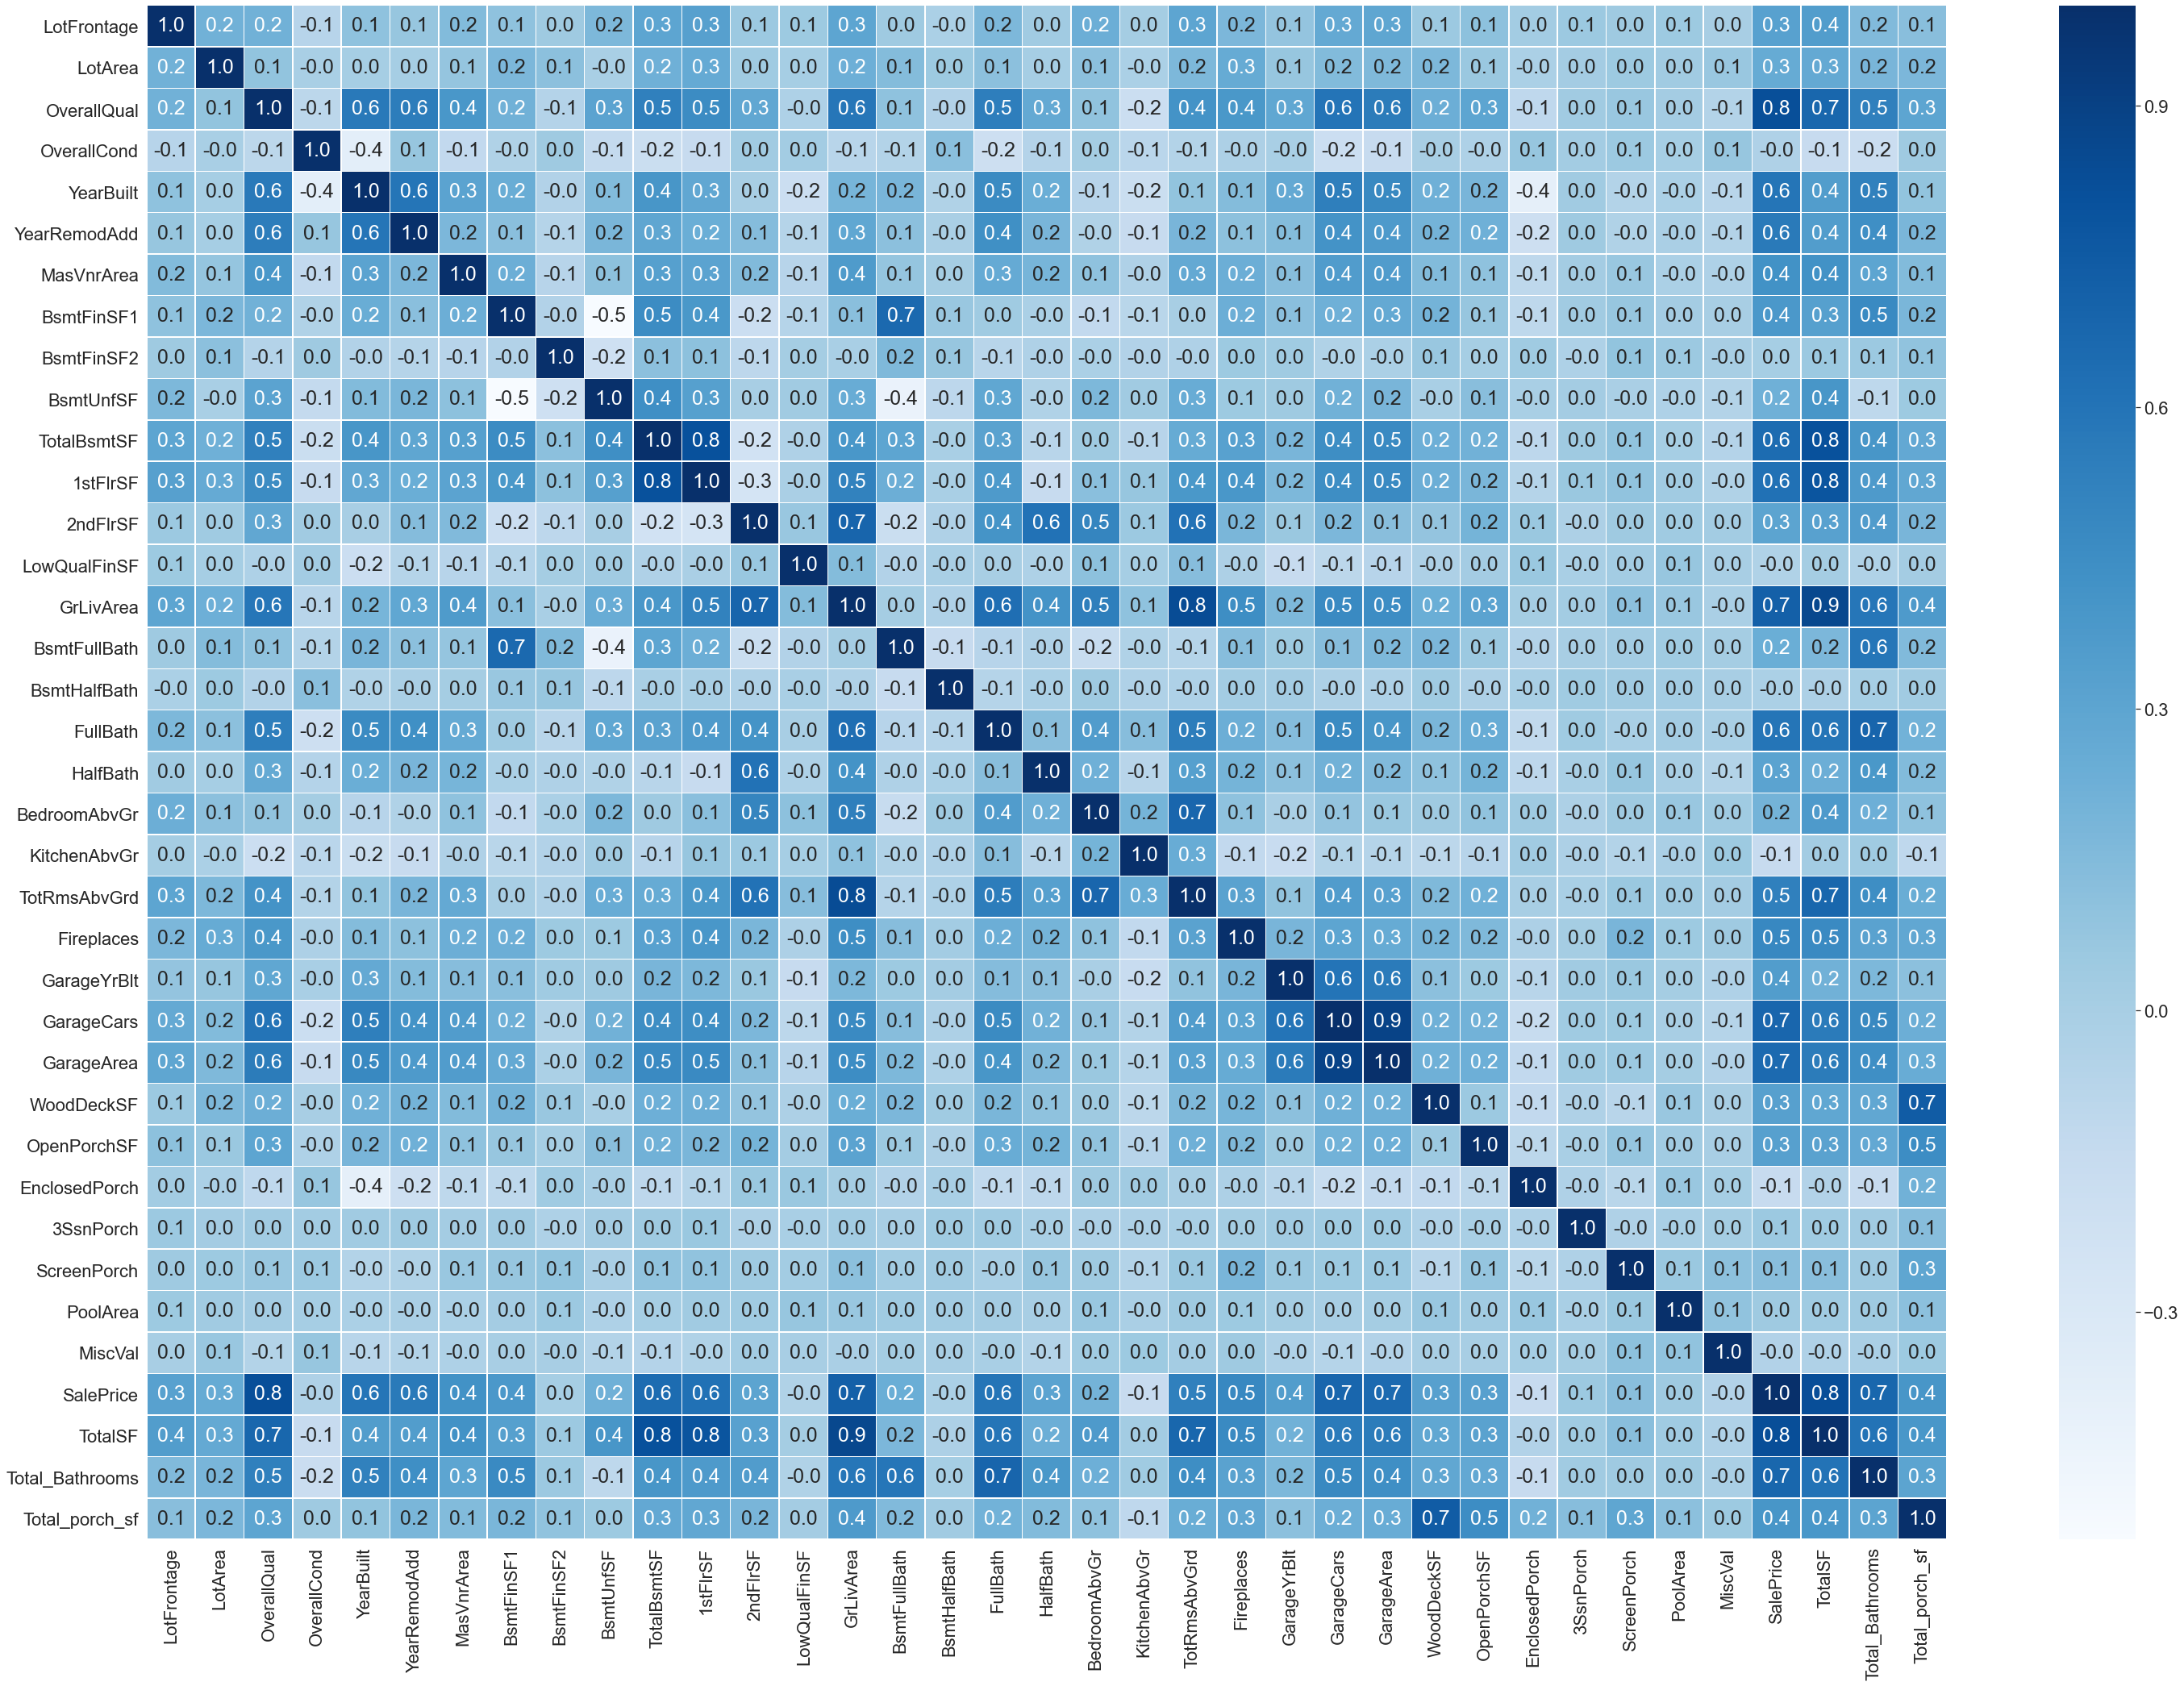

In [35]:
# investigate current correlations among variables
correlation_train=train_fillna.corr()
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sns.heatmap(correlation_train, annot=True,annot_kws={"size": 25},fmt='.1f',cmap='Blues', linewidths=.5)

It seems that SalePrice is highly associated with the overall quality and square feet related features. Now, let's removed the features that were used to construct our own features to get more intuition.

In [36]:
# define function to remove features that were used for feature engineering and generating new features
def remove_features(df):
    df = df.drop(columns=['TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtFullBath',
            "BsmtHalfBath",'FullBath','HalfBath','OpenPorchSF','EnclosedPorch','WoodDeckSF',
                         '3SsnPorch','ScreenPorch'])
    return df

In [37]:
# remove features from training dataset
train_final = remove_features(train_fillna)
train_final .shape

(1453, 71)

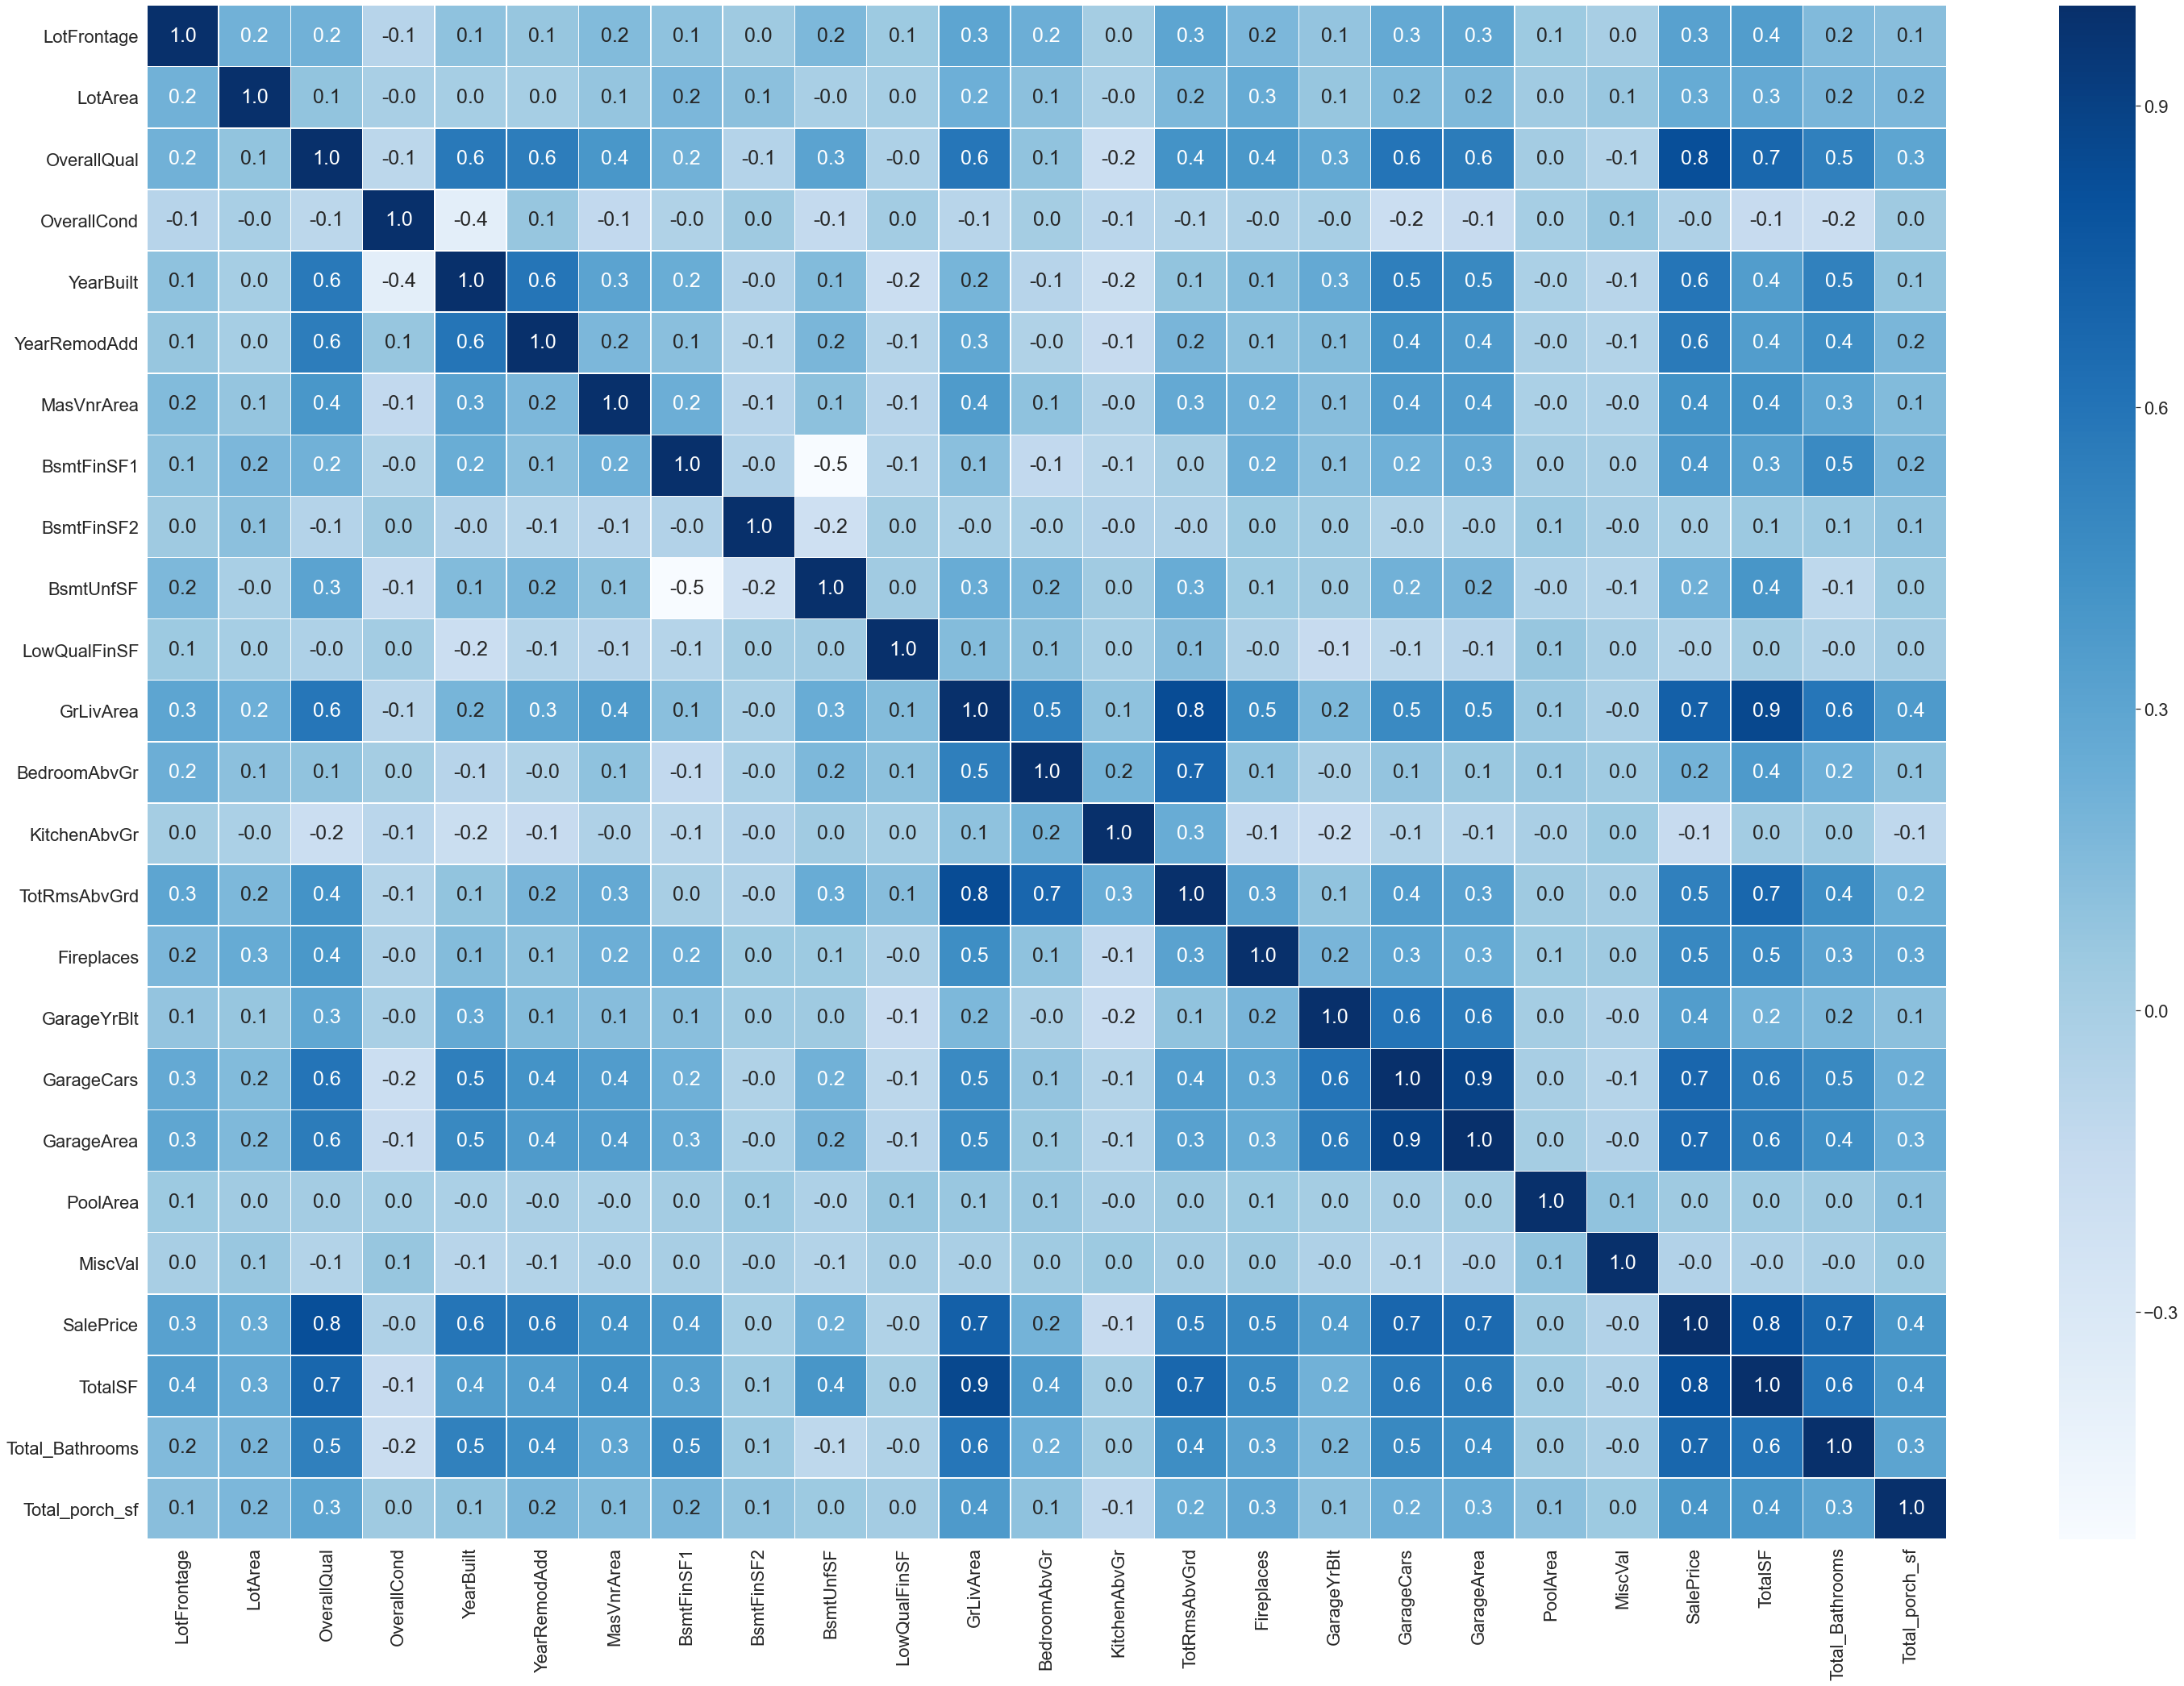

In [38]:
# investigate correlations among variables after removing some features
correlation_train=train_final.corr()
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sns.heatmap(correlation_train, annot=True,annot_kws={"size": 25},fmt='.1f',cmap='Blues', linewidths=.5)

In [39]:
# do the same procedure to the test dataset
test_final = remove_features(test_fillna)
test_final.shape

(1459, 70)

Now, the sale price is still highly correlated with the overall quality, above ground living area square feet, total square feet, total number of bathrooms, garage car capacity, garage area, year built, and year remodeled, which are exactly as we found in the previous EDA.

## Dummify Categorical Variables and Prepare Data for Modeling

In [40]:
# split features and outcome for dummification
target = train_final['SalePrice'].reset_index(drop=True)
train_features = train_final.drop(['SalePrice'], axis=1)
test_features = test_final

# combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
print(all_features.shape,target.shape)

(2912, 70) (1453,)


In [43]:
# dummify categorical variables
df_dummy = pd.get_dummies(all_features).reset_index(drop=True)
df_dummy.shape

(2912, 321)

In [44]:
# remove any duplicated column names
df_dummy = df_dummy.loc[:,~df_dummy.columns.duplicated()]
df_dummy.shape

(2912, 321)

In [45]:
# recreate training and testing datasets
df_train = df_dummy.iloc[:len(target), :]
df_test = df_dummy.iloc[len(target):, :]
print(df_train.shape, target.shape, df_test.shape)

(1453, 321) (1453,) (1459, 321)


In [46]:
# save two dataset to csv files for modeling use
target.to_csv('target.csv',index=False)
df_train.to_csv('df_train.csv', index = False)
df_test.to_csv('df_test.csv', index = False)